# Machine Learning–Based Employee Attrition Prediction

This project aims to predict employee attrition using machine learning.
The goal is to identify employees who are at risk of leaving the company
and provide insights that help HR teams take proactive decisions.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
df = pd.read_csv('../data/Palo Alto Networks.csv')


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [88]:
df.shape


(1470, 31)

In [89]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [90]:
df["Attrition"].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [91]:
df["Attrition"].value_counts(normalize=True) * 100


Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

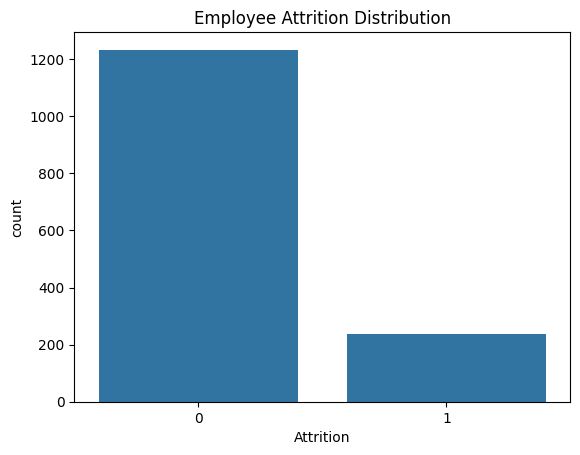

In [92]:
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Distribution")
plt.show()



In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [94]:
df["Attrition"].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [95]:
df["Attrition"].value_counts(normalize=True) * 100


Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

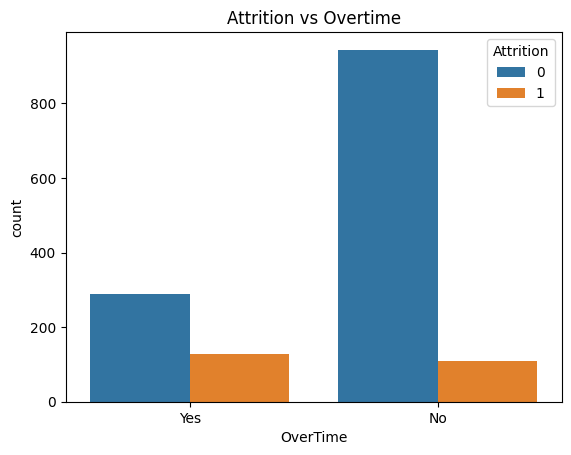

In [96]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition vs Overtime")
plt.show()


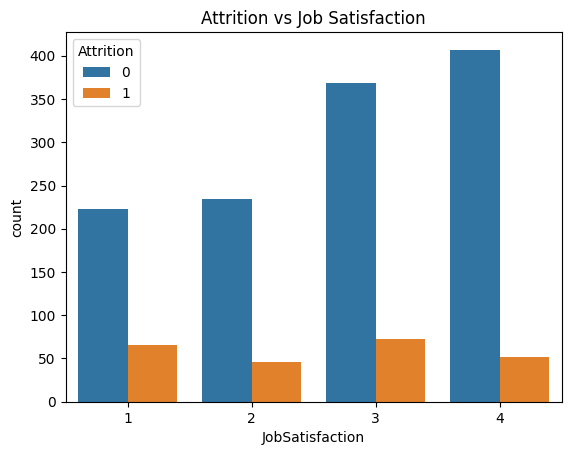

In [97]:
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df)
plt.title("Attrition vs Job Satisfaction")
plt.show()


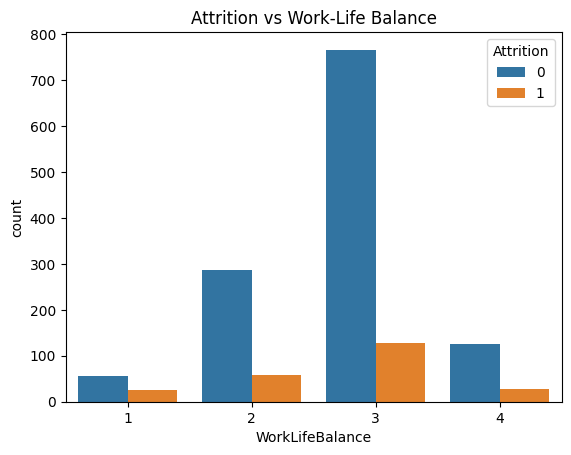

In [98]:
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df)
plt.title("Attrition vs Work-Life Balance")
plt.show()


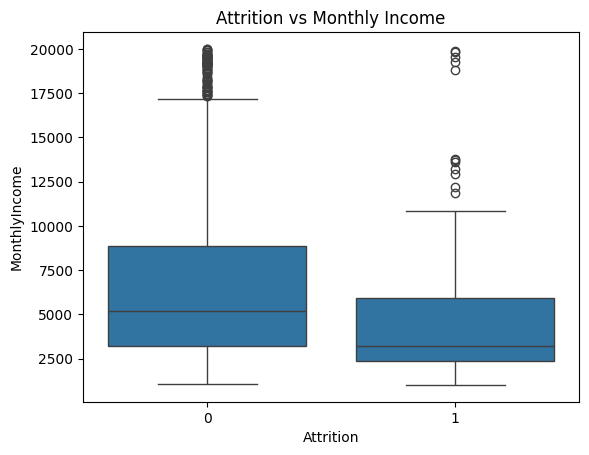

In [99]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income")
plt.show()


In [100]:
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})


In [101]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [102]:
X.select_dtypes(include=["object"]).columns


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [103]:
X = pd.get_dummies(X, drop_first=True)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [105]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1176, 44)
X_test shape: (294, 44)
y_train shape: (1176,)
y_test shape: (294,)


In [106]:
import pandas as pd

df = pd.read_csv('../data/Palo Alto Networks.csv')


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [107]:
from sklearn.linear_model import LogisticRegression


In [108]:
df["Attrition"].isna().sum()

np.int64(0)

In [109]:
df["Attrition"].unique()




array([1, 0])

In [110]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [111]:
X = pd.get_dummies(X, drop_first=True)


In [112]:
# 1️⃣ Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2️⃣ Create Pipeline Model (PUT THIS HERE)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(max_iter=5000))
])

# 3️⃣ Train
model.fit(X_train, y_train)

# 4️⃣ Predict
y_pred = model.predict(X_test)

# 5️⃣ Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



In [113]:
model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [114]:
df["Attrition"].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [115]:
df.isna().sum().sort_values(ascending=False).head(10)


Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [117]:
from sklearn.metrics import classification_report


In [118]:
y_pred = model.predict(X_test)


In [119]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(max_iter=5000))
])


In [121]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(max_iter=5000, class_weight='balanced'))
])


In [123]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [124]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Accuracy: 0.7278911564625851
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       255
           1       0.27      0.62      0.38        39

    accuracy                           0.73       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.84      0.73      0.77       294



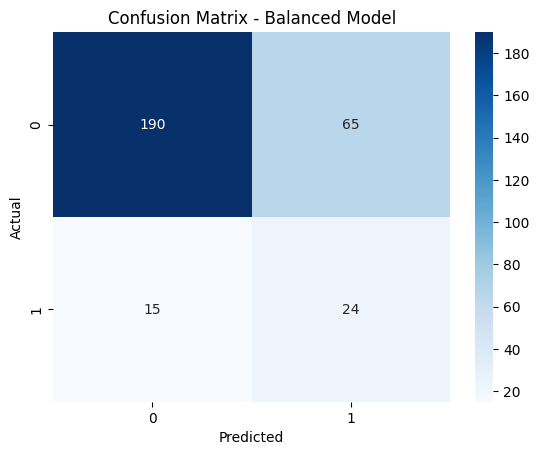

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_balanced)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Model")
plt.show()


In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [127]:
y_prob = model_balanced.predict_proba(X_test)[:, 1]


In [128]:
print(y.isnull().sum())


0


In [129]:
df['Attrition'].isnull().sum()


np.int64(0)

In [130]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [131]:
print("NaN in df['Attrition']:", df["Attrition"].isnull().sum())


NaN in df['Attrition']: 0


In [132]:
y = df["Attrition"]
print("NaN in y:", y.isnull().sum())


NaN in y: 0


In [133]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]



In [134]:
X = pd.get_dummies(X, drop_first=True)



In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [136]:
print("NaN in y_train:", y_train.isnull().sum())
print("NaN in y_test:", y_test.isnull().sum())


NaN in y_train: 0
NaN in y_test: 0


In [137]:
from sklearn.preprocessing import StandardScaler


In [138]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [139]:
model_balanced = LogisticRegression(max_iter=2000, class_weight='balanced')

model_balanced.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [140]:
y_pred_balanced = model_balanced.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Accuracy: 0.717687074829932
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       255
           1       0.26      0.59      0.36        39

    accuracy                           0.72       294
   macro avg       0.59      0.66      0.59       294
weighted avg       0.83      0.72      0.76       294



In [141]:
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [143]:
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(
    max_iter=5000,
    class_weight='balanced'
)


In [144]:
model_balanced.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [145]:
y_pred_balanced = model_balanced.predict(X_test_scaled)


In [146]:
y_prob = model_balanced.predict_proba(X_test_scaled)[:, 1]


In [147]:
import numpy as np

y_pred_custom = np.where(y_prob > 0.3, 1, 0)


In [148]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Accuracy: 0.6156462585034014
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       255
           1       0.23      0.79      0.35        39

    accuracy                           0.62       294
   macro avg       0.59      0.69      0.54       294
weighted avg       0.85      0.62      0.68       294



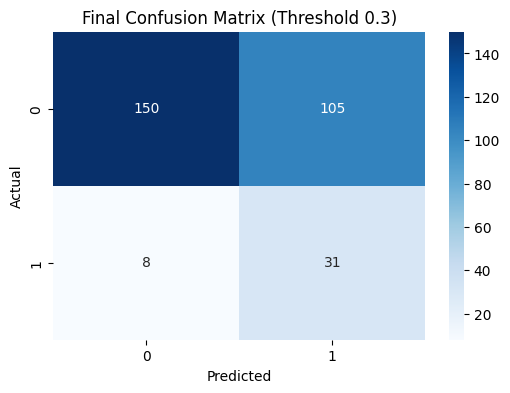

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Final Confusion Matrix (Threshold 0.3)")
plt.show()


In [150]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.7660130718954249


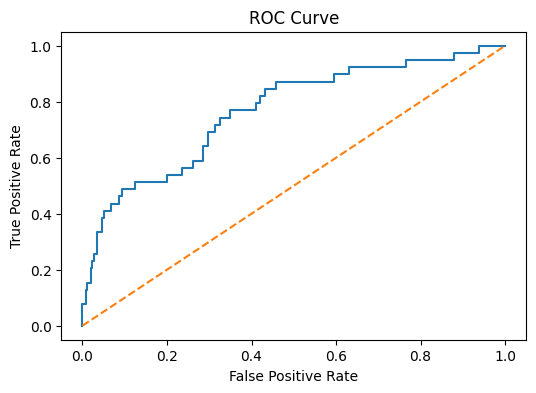

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [152]:
risk_level = []

for p in y_prob:
    if p < 0.3:
        risk_level.append("Low Risk")
    elif p < 0.6:
        risk_level.append("Medium Risk")
    else:
        risk_level.append("High Risk")


In [153]:
results = pd.DataFrame({
    "Actual_Attrition": y_test.values,
    "Predicted_Attrition": y_pred_custom,
    "Probability": y_prob,
    "Risk_Level": risk_level
})

results.head()


,Actual_Attrition,Predicted_Attrition,Probability,Risk_Level
0,0,0,0.262215,Low Risk
1,0,0,0.022569,Low Risk
2,1,1,0.740744,High Risk
3,0,0,0.059533,Low Risk
4,0,0,0.213304,Low Risk


In [154]:
results["Risk_Level"].value_counts()


Risk_Level
Low Risk       158
Medium Risk     72
High Risk       64
Name: count, dtype: int64

In [155]:
# Recreate and train final model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
final_model = LogisticRegression(max_iter=5000, class_weight='balanced')
final_model.fit(X_train_scaled, y_train)

# Get probabilities again
y_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Apply threshold again
import numpy as np
y_pred_custom = np.where(y_prob > 0.3, 1, 0)




In [156]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": final_model.coef_[0]
})

importance["Absolute"] = importance["Coefficient"].abs()
importance = importance.sort_values("Absolute", ascending=False)

importance.head(10)


,Feature,Coefficient,Absolute
19,YearsAtCompany,0.966833,0.966833
43,OverTime_Yes,0.930391,0.930391
34,JobRole_Laboratory Technician,0.899818,0.899818
42,MaritalStatus_Single,0.765113,0.765113
20,YearsInCurrentRole,-0.721643,0.721643
23,BusinessTravel_Travel_Frequently,0.717590,0.717590
40,JobRole_Sales Representative,0.647942,0.647942
26,Department_Sales,0.626707,0.626707
22,YearsWithCurrManager,-0.553203,0.553203
33,JobRole_Human Resources,0.544229,0.544229


In [157]:
# Merge risk back with original test data
X_test_with_dept = X_test.copy()
X_test_with_dept["Risk_Level"] = risk_level

# If Department column was encoded earlier, use original df
dept_risk = pd.concat([df.loc[X_test.index, "Department"], 
                       pd.Series(risk_level, index=X_test.index)], axis=1)

dept_risk.columns = ["Department", "Risk_Level"]

dept_risk.groupby("Department")["Risk_Level"].value_counts()


Department              Risk_Level 
Human Resources         High Risk        6
                        Low Risk         4
                        Medium Risk      3
Research & Development  Low Risk       114
                        Medium Risk     47
                        High Risk       35
Sales                   Low Risk        40
                        High Risk       23
                        Medium Risk     22
Name: count, dtype: int64

In [158]:
results.sort_values("Probability", ascending=False).head(10)


,Actual_Attrition,Predicted_Attrition,Probability,Risk_Level
223,1,1,0.986598,High Risk
38,1,1,0.970823,High Risk
46,1,1,0.961441,High Risk
179,0,1,0.953450,High Risk
111,0,1,0.943881,High Risk
273,1,1,0.942317,High Risk
147,1,1,0.924447,High Risk
140,0,1,0.921087,High Risk
44,1,1,0.920602,High Risk
230,0,1,0.920302,High Risk


In [159]:
results.to_csv("Final_Attrition_Risk_Predictions.csv", index=False)


In [160]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))


In [161]:
model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [162]:
import pickle

# Save trained model
pickle.dump(model, open("model.pkl", "wb"))

# Save feature column names
pickle.dump(X.columns, open("columns.pkl", "wb"))

print("Model and columns saved successfully!")


Model and columns saved successfully!
